# Vrinda Store Python Project

## Importing Libraries

In this step, we import important Python libraries needed for data analysis and visualization:

- `numpy` for numerical operations

- `pandas` to handle data in tables (DataFrames)

- `matplotlib.pyplot` for creating graphs and plots

- `seaborn` for advanced statistical visualizations built on matplotlib

This setup prepares the environment to read, process, and visualize the dataset efficiently.

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, html, dcc, Input, Output
import io
import base64

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
file_path = "Vrinda Store Sales Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "amitkumar209/vrinda-store-sales-data",
  file_path,)

df.head()

C:\Users\gaura\AppData\Local\Temp\ipykernel_10312\2145663757.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,9913,404-2354738-3233942,2354738,Women,67,04-01-2022,Delivered,Meesho,JNE3613-KR-S,kurta,S,1,INR,399,MUMBAI,MAHARASHTRA,400077,IN,False
1,9914,403-4459077-2255503,4459077,Women,20,04-01-2022,Delivered,Nalli,SET268-KR-NP-XL,Set,XL,1,INR,788,KALYAN,MAHARASHTRA,421301,IN,False
2,9915,403-4459077-2255503,4459077,Women,52,04-01-2022,Delivered,Amazon,JNE3516-KR-E-S,kurta,S,1,INR,362,HYDERABAD,TELANGANA,500050,IN,False
3,9916,403-4459077-2255503,4459077,Women,45,04-01-2022,Delivered,Myntra,SET278-KR-NP-XXL,Set,XXL,1,INR,1442,VISAKHAPATNAM,ANDHRA PRADESH,530016,IN,False
4,9917,403-0387488-1209953,387488,Women,33,04-01-2022,Delivered,Flipkart,SET375-KR-NP-XXXL,Set,3XL,1,INR,696,NAVI MUMBAI,MAHARASHTRA,400708,IN,False


## Loading Data

Here, the dataset is loaded into a pandas DataFrame from an Excel file located at the specified path.

- The `index_col="index"` parameter sets the column named "index" as the DataFrame's row index.

- This allows easier data manipulation and referencing by row.

Make sure the filepath is correct and accessible on your system before running this cell.

The `df.info()` method is used to get a concise summary of the DataFrame.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             31047 non-null  int64 
 1   Order ID          31047 non-null  object
 2   Cust ID           31047 non-null  int64 
 3   Gender            31047 non-null  object
 4   Age               31047 non-null  int64 
 5   Date              31047 non-null  object
 6   Status            31047 non-null  object
 7   Channel           31047 non-null  object
 8   SKU               31047 non-null  object
 9   Category          31047 non-null  object
 10  Size              31047 non-null  object
 11  Qty               31047 non-null  object
 12  currency          31047 non-null  object
 13  Amount            31047 non-null  int64 
 14  ship-city         31047 non-null  object
 15  ship-state        31047 non-null  object
 16  ship-postal-code  31047 non-null  int64 
 17  ship-country

## Data Cleaning

### Cleaning and Standardizing Columns
Some columns may have inconsistent or non-numeric entries. Here, we fix the `Gender` and `Qty` columns:

#### Fix Gender Values
- Replace shorthand labels 'M' and 'W' with full words 'Men' and 'Women'.

- This makes the data easier to read and analyze.

In [4]:
# Replace abbreviations with full gender names
df['Gender'] = df['Gender'].replace('M', 'Men')
df['Gender'] = df['Gender'].replace('W', 'Women')

# Check unique gender values after replacement
df['Gender'].unique()

array(['Women', 'Men'], dtype=object)

#### Fix Quantity Values
- Replace textual quantity values like 'One' and 'Two' with numeric values 1 and 2.

- This allows numerical calculations and aggregations on the quantity column.

In [5]:
# Replace word quantities with numeric values
df['Qty'] = df['Qty'].replace('One', 1)
df['Qty'] = df['Qty'].replace('Two', 2)

# Check unique quantity values after replacement
df['Qty'].unique()

array(['1', '2', '3', 2, 1, '4', '5'], dtype=object)

Convert the Data Type of Date Column

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.columns = df.columns.str.strip()

## Data Processing

### Creating New Columns: Month and Age Group
#### Extract Month from Date
- The `Month` column is created by extracting the month part from the Date column.

- This will help analyze trends over different months.

In [7]:
# Extract month number from 'Date' column and store in new 'Month' column
df['Month'] = df['Date'].dt.month

df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
31042    12
31043    12
31044    12
31045    12
31046    12
Name: Month, Length: 31047, dtype: int32

#### Categorize Age into Groups
- Create a new column `Age Group` based on the customer’s age:

    - Age > 50 → 'Senior'

    - Age < 30 → 'Young'

    - Otherwise → 'Adult'

In [8]:
# Categorize ages into groups: Senior, Young, Adult
df['Age Group'] = np.where(df['Age'] > 50, 'Senior',
                           np.where(df['Age'] < 30, 'Young', 'Adult'))

### Preview Random Sample of Data
- Display 5 random rows to inspect the new columns and overall data.

In [9]:
# Show a random sample of 5 rows with new columns
df.sample(5)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Month,Age Group
18352,25942,403-3489200-1095518,3489200,Women,22,2022-07-06,Delivered,Myntra,J0003-SET-XXL,Set,...,1,INR,655,KARWI,UTTAR PRADESH,210205,IN,False,7,Young
30632,22051,403-2009851-4817933,2009851,Women,45,2022-12-06,Delivered,Amazon,MEN5004-KR-XL,kurta,...,1,INR,480,Howrah,WEST BENGAL,711102,IN,False,12,Adult
10514,28410,402-3477131-7866740,3477131,Women,28,2022-04-06,Delivered,Amazon,JNE3399-KR-M,kurta,...,1,INR,435,KURNOOL,ANDHRA PRADESH,518003,IN,False,4,Young
17505,15065,407-6412459-3318765,6412459,Men,74,2022-07-05,Delivered,Amazon,J0230-SKD-L,Set,...,1,INR,1111,PUNE,MAHARASHTRA,411030,IN,False,7,Senior
27003,1536,405-7376929-8431531,7376929,Men,25,2022-11-04,Delivered,Myntra,J0341-DR-L,Western Dress,...,1,INR,1168,LUDHIANA,PUNJAB,141001,IN,False,11,Young


## Data Analysis

### Monthly Revenue and Orders Analysis

#### Step 1: Aggregate Monthly Revenue
- Group data by `Month` and sum the `Amount` column to get total monthly revenue.

- Convert the result to a DataFrame and reset the index.

In [10]:
# Calculate total revenue for each month
df_monthly_sales = df.groupby('Month')['Amount'].sum().to_frame('revenue').reset_index()
df_monthly_sales

,Month,revenue
0,1,1820601
1,2,1875932
2,3,1928066
3,4,1829263
4,5,1797822
5,6,1750966
6,7,1772300
7,8,1808505
8,9,1688871
9,10,1666662


#### Step 2: Add Month Names
- Convert the month number to abbreviated month names (e.g., Jan, Feb).

- Set the month names as the DataFrame index for easier plotting.

In [11]:
# Convert month number to abbreviated month name (e.g., 'Jan')
df_monthly_sales['month_name'] = pd.to_datetime(df_monthly_sales['Month'], format='%m').dt.strftime('%b')

# Set month names as index and drop the old 'Month' column
df_monthly_sales.set_index('month_name', inplace=True)
df_monthly_sales.drop('Month', axis=1, inplace=True)
df_monthly_sales

,revenue
month_name,
Jan,1820601
Feb,1875932
Mar,1928066
Apr,1829263
May,1797822
Jun,1750966
Jul,1772300
Aug,1808505
Sep,1688871


#### Step 3: Count Monthly Orders
- Count the number of orders per month.

- Sort by month, convert month number to abbreviated names, and set as index.

In [12]:
# Count orders per month
df_monthly_orders = df['Month'].value_counts().sort_index().reset_index(name = 'order_count')

# Add month names and set as index
df_monthly_orders['month_name'] = pd.to_datetime(df_monthly_orders['Month'], format = '%m').dt.strftime('%b')
df_monthly_orders.set_index('month_name', inplace=True)
df_monthly_orders.drop('Month', axis = 1, inplace=True)
df_monthly_orders

,order_count
month_name,
Jan,2702
Feb,2750
Mar,2819
Apr,2685
May,2617
Jun,2597
Jul,2579
Aug,2617
Sep,2490


#### Step 4: Plot Monthly Revenue and Orders
- Create a bar plot for monthly revenue on the primary y-axis.

- Format y-axis labels to show revenue in lakhs (1 Lakh = 100,000).

- Create a line plot for monthly order count on the secondary y-axis.

- Customize axes, labels, and title for clarity.

- Save the plot as a high-resolution image file.

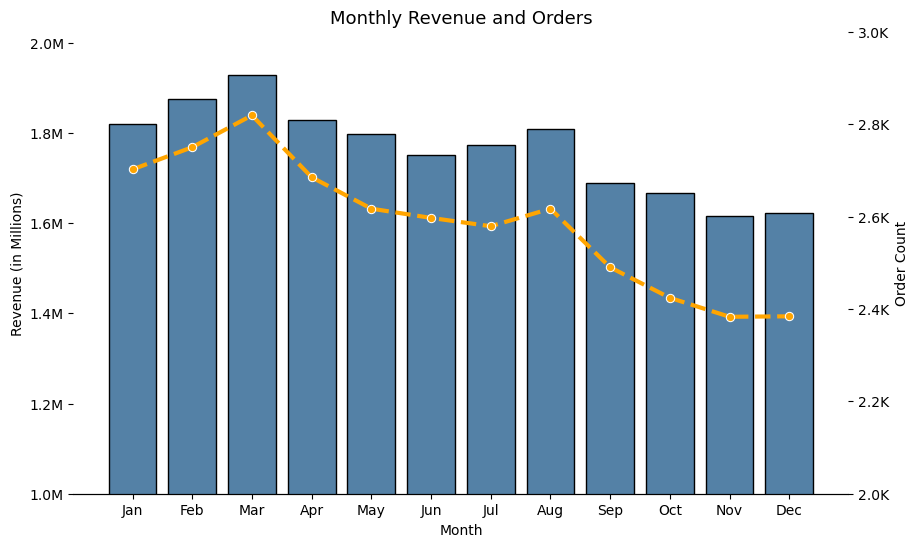

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for monthly revenue
sns.barplot(data = df_monthly_sales,
            x = 'month_name',
            y = 'revenue',
            color = 'steelblue',
            edgecolor = 'black',
            ax = ax1)

ax1.set_ylim(1_000_000)  # Set minimum y-axis limit for revenue
ax1.set_ylabel("Revenue (in Millions)")
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M'))

# Create a second y-axis to plot order count
ax2 = ax1.twinx()

# Line plot for order count
sns.lineplot(data = df_monthly_orders,
             x = 'month_name',
             y = 'order_count',
             color = 'orange',
             marker = 'o',
             linewidth = 3,
             linestyle = '--')

ax2.set_ylim(2000, 3000)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.1f}K'))

plt.title("Monthly Revenue and Orders", fontsize=13)
ax1.set_xlabel("Month")
ax2.set_ylabel("Order Count")

# Remove top and right spines for a cleaner look
sns.despine(left=True, right=True)

plt.show()

### Revenue Distribution by Gender

#### Step 1: Aggregate Revenue by Gender
- Group the data by `Gender` column.

- Sum the Amount spent by each gender group.

- The result shows total revenue contributed by men and women.

In [14]:
# Calculate total revenue generated by each gender
df_gender_sales = df.groupby('Gender')['Amount'].sum()
df_gender_sales

Gender
Men       7613604
Women    13562773
Name: Amount, dtype: int64

#### Step 2: Create and Save Pie Chart
- Plot a pie chart to show how revenue is divided between males and females.

- Use labels for better understanding.

- Display percentages on the slices.

- Add a title, save the plot as a high-quality image, and display it.

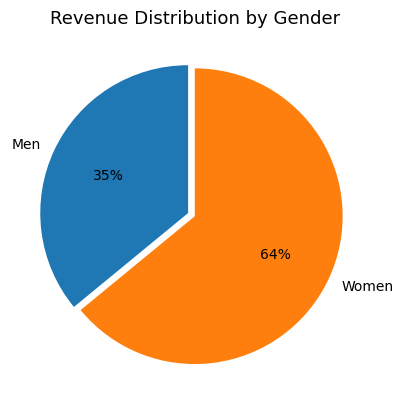

In [15]:
# Plot pie chart with labels and percentage display
explode_list = [0.05, 0]
plt.pie(df_gender_sales, 
        startangle=90,  
        autopct='%1i%%',
        explode = explode_list,
        labels=['Men', "Women"])

plt.title("Revenue Distribution by Gender", fontsize=13)
plt.show()

### Order Status Distribution

#### Step 1: Count Orders by Status
- Use `value_counts()` to count how many orders fall into each status category.

- This tells us the frequency of each order status like Delivered, Returned, etc.

In [16]:
# Count number of orders for each status
df_order_status = df.Status.value_counts()

#### Step 2 : Plot and Finalize Pie Chart of Order Status
- Create a pie chart to visualize the proportions of different order statuses.

- The slice positions start at 360 degrees for better visual balance.

- Show percentages on each slice with one decimal place.

- Label each slice explicitly for clarity.

- Use `explode` to slightly separate all slices for emphasis.

- Add a clear title, save the image in high resolution, and display the plot.

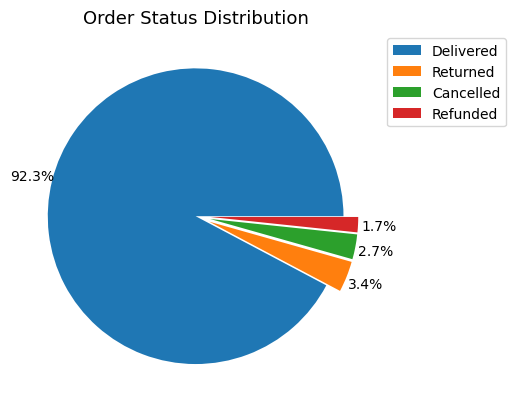

In [17]:
# Plot pie chart showing order status distribution with labeled slices and percentages
explode_list = [0, 0.1, 0.1, 0.1]
plt.pie(df_order_status,
        startangle = 360,
        autopct = '%1.1f%%',
        labels = None,
        explode = explode_list,
        pctdistance = 1.14)

plt.legend(labels = df_order_status.index, bbox_to_anchor = (1, 1))
plt.title("Order Status Distribution", fontsize = 13)
plt.show()

### Top Revenue States

#### Step 1: Aggregate Revenue by State
- Group the data by the `ship-state` column.

- Sum the revenue (`Amount`) for each state.

- Sort the states by revenue in descending order.

- Select the top 5 states with highest revenue.

In [18]:
# Calculate total revenue per shipping state and select top 5 states
df_top_state = df.groupby('ship-state')['Amount'].sum().to_frame(name='revenue')
df_top_state = df_top_state.sort_values(by = 'revenue', ascending=False).head()

#### Step 2: Plot Horizontal Bar Chart
- Create a horizontal bar chart with revenue on the x-axis and states on the y-axis.

- Use a color palette that darkens with increasing revenue.

- Remove x-axis tick labels for a cleaner look.

- Annotate revenue values next to bars in lakhs (1 Lakh = 100,000).

- Remove axis labels and legend for simplicity.

- Remove chart spines for a cleaner visual.

- Save the plot as a high-resolution image and display it.

C:\Users\gaura\AppData\Local\Temp\ipykernel_10312\1326473976.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


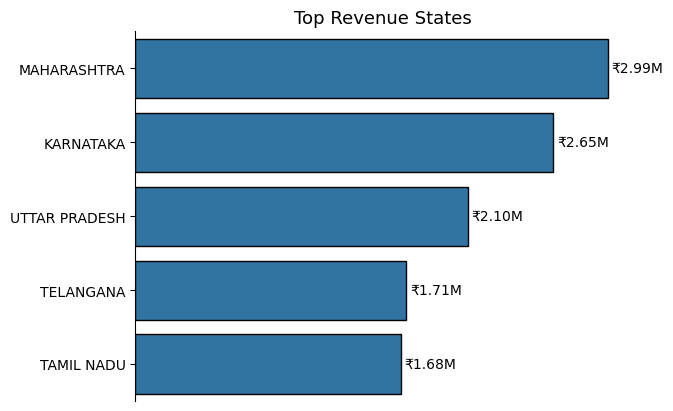

In [19]:
sns.barplot(data = df_top_state,
            x = 'revenue',
            y = 'ship-state',
            edgecolor='black')

plt.xticks([])  # Hide x-axis ticks

# Add revenue labels in lakhs to the right of each bar
for i, revenue in enumerate(df_top_state['revenue']):
    plt.text(revenue + 25_000, i, f"₹{revenue/1000000:,.2f}M", va='center')

plt.title("Top Revenue States", fontsize = 13)
plt.xlabel('')
plt.ylabel('')

plt.legend().remove()
sns.despine(bottom = True)
plt.show()

### Order Percentage Distribution by Channel

#### Step 1: Calculate Orders by Channel
- Group the data by the `Channel` column (note the trailing space).

- Sum the total order (`Order ID`) per channel.

- Calculate the percentage contribution of each channel to the overall orders.

In [20]:
# Calculate total revenue per sales channel and percentage contribution
df_channel_order = df['Channel'].value_counts().reset_index()
df_channel_order['Order_%']= round(df_channel_order['count'] / df['Order ID'].count() * 100, 1)
df_channel_order

,Channel,count,Order_%
0,Amazon,11016,35.5
1,Myntra,7254,23.4
2,Flipkart,6703,21.6
3,Ajio,1931,6.2
4,Nalli,1484,4.8
5,Meesho,1398,4.5
6,Others,1261,4.1


#### Step 2: Plot Percentage Revenue by Channel
- Use a horizontal bar plot to show revenue percentages by channel.

- Hide x-axis ticks for a cleaner look.

- Annotate each bar with the percentage value.

- Remove legend and chart bottom spine for a simpler design.

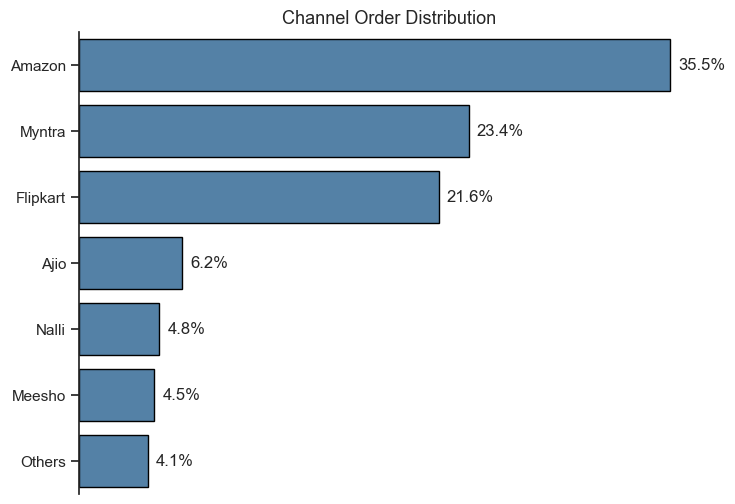

In [21]:
plt.figure(figsize=(8, 6))
sns.set_theme(style='ticks')

sns.barplot(data = df_channel_order,
            x = 'Order_%',
            y = 'Channel',
            color = 'steelblue',
            edgecolor = 'black',
            legend = False)

plt.xticks([])
for i, per in enumerate(df_channel_order['Order_%']):
    plt.text(per + 0.5, i, f"{per}%", va='center')
    
plt.title("Channel Order Distribution", fontsize=13)
plt.xlabel("")
plt.ylabel("")

sns.despine(bottom=True)
plt.show()

### Order Distribution by Age Group and Gender

#### Step 1: Create Pivot Table of Order Counts
- Use a pivot table to count orders by `Age Group` and `Gender`.

- Calculate percentage of total orders for men and women within each age group.

In [22]:
# Pivot table showing counts of orders by Age Group and Gender
df_age_group = df.pivot_table(index='Age Group', columns='Gender', aggfunc='size')

# Calculate order percentage relative to total order count
df_age_group['Men%'] = 100 * df_age_group['Men'] / df['Order ID'].size
df_age_group['Women%'] = 100 * df_age_group['Women'] / df['Order ID'].size
df_age_group

Gender,Men,Women,Men%,Women%
Age Group,,,,
Adult,4862,10861,15.660128,34.982446
Senior,1777,4132,5.723580,13.308854
Young,2855,6560,9.195735,21.129256


#### Step 2: Reshape Data for Plotting
- Melt the dataframe so percentages for Men and Women become a single column.

- This format is suitable for seaborn’s grouped bar plot.

In [23]:
# Reshape dataframe to long format for plotting grouped bars
df_age_group_melted = df_age_group.reset_index().melt(
    id_vars = 'Age Group',
    value_vars = ['Men%', 'Women%'],
    var_name = 'Gender',
    value_name = 'Percentage'
)

df_age_group_melted

,Age Group,Gender,Percentage
0,Adult,Men%,15.660128
1,Senior,Men%,5.723580
2,Young,Men%,9.195735
3,Adult,Women%,34.982446
4,Senior,Women%,13.308854
5,Young,Women%,21.129256


#### Step 3: Plot Grouped Bar Chart
- Plot age groups on x-axis, percentage of orders on y-axis.

- Show separate bars for men and women, with clear labels on bars.

- Remove y-axis ticks and add a descriptive title.

- Clean chart borders for a simple look.

- Save and display the chart.

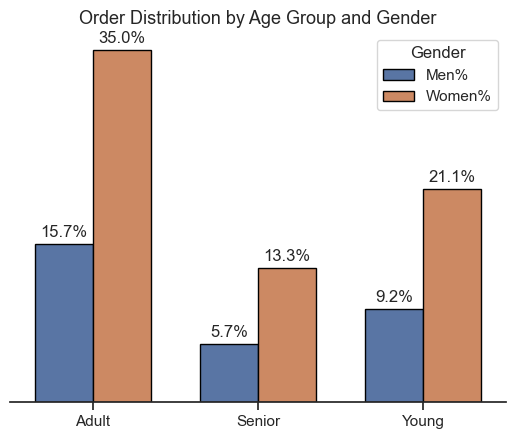

In [24]:
ax = sns.barplot(data = df_age_group_melted,
            x = 'Age Group',
            y = 'Percentage',
            hue = 'Gender',
            dodge = True,
            width = 0.7,
            edgecolor = 'black')

# Remove y-axis ticks
ax.set_yticks([])

# Add percentage labels on top of each bar
for container in ax.containers:
    plt.bar_label(container, fmt="%.1f%%", label_type="edge", padding=3)

plt.title("Order Distribution by Age Group and Gender", fontsize = 13)
plt.xlabel('')
plt.ylabel('')

sns.despine(left=True)
plt.show()

## Static Dashboard

### Creating a Static Dashboard: Comprehensive Analysis View

Up until now, we have created individual visualizations for each analysis aspect. Now, we combine all six key insights into a single **static dashboard**.

#### What is a Static Dashboard?

A **static dashboard** (also called a **fixed dashboard** or **analytical dashboard**) is a multi-panel visualization that displays multiple charts together in one cohesive view. Unlike interactive dashboards, static dashboards are:

- **Fixed**: All visualizations are pre-defined and unchangeable
- **Comprehensive**: Multiple metrics displayed at once
- **Report-ready**: Perfect for presentations, reports, and documentation
- **Easy to share**: Can be exported as a single image file

#### Dashboard Components

Our 6-panel dashboard includes:

1. **Monthly Revenue and Orders** – Dual-axis chart showing revenue trends with order volume
2. **Revenue Distribution by Gender** – Pie chart showing male vs. female contribution
3. **Order Status Distribution** – Pie chart displaying order fulfillment rates
4. **Top Revenue States** – Horizontal bar chart of top 5 performing states
5. **Revenue % by Channel** – Horizontal bar chart showing channel performance
6. **Order Distribution by Age Group and Gender** – Grouped bar chart for demographic analysis

#### Benefits of This Approach

- **Quick Overview**: Stakeholders can see all key metrics at a glance
- **Comparison**: Easy to spot patterns across different dimensions
- **Professional**: Single consolidated view for presentations
- **Consistent**: All charts use the same styling and color scheme

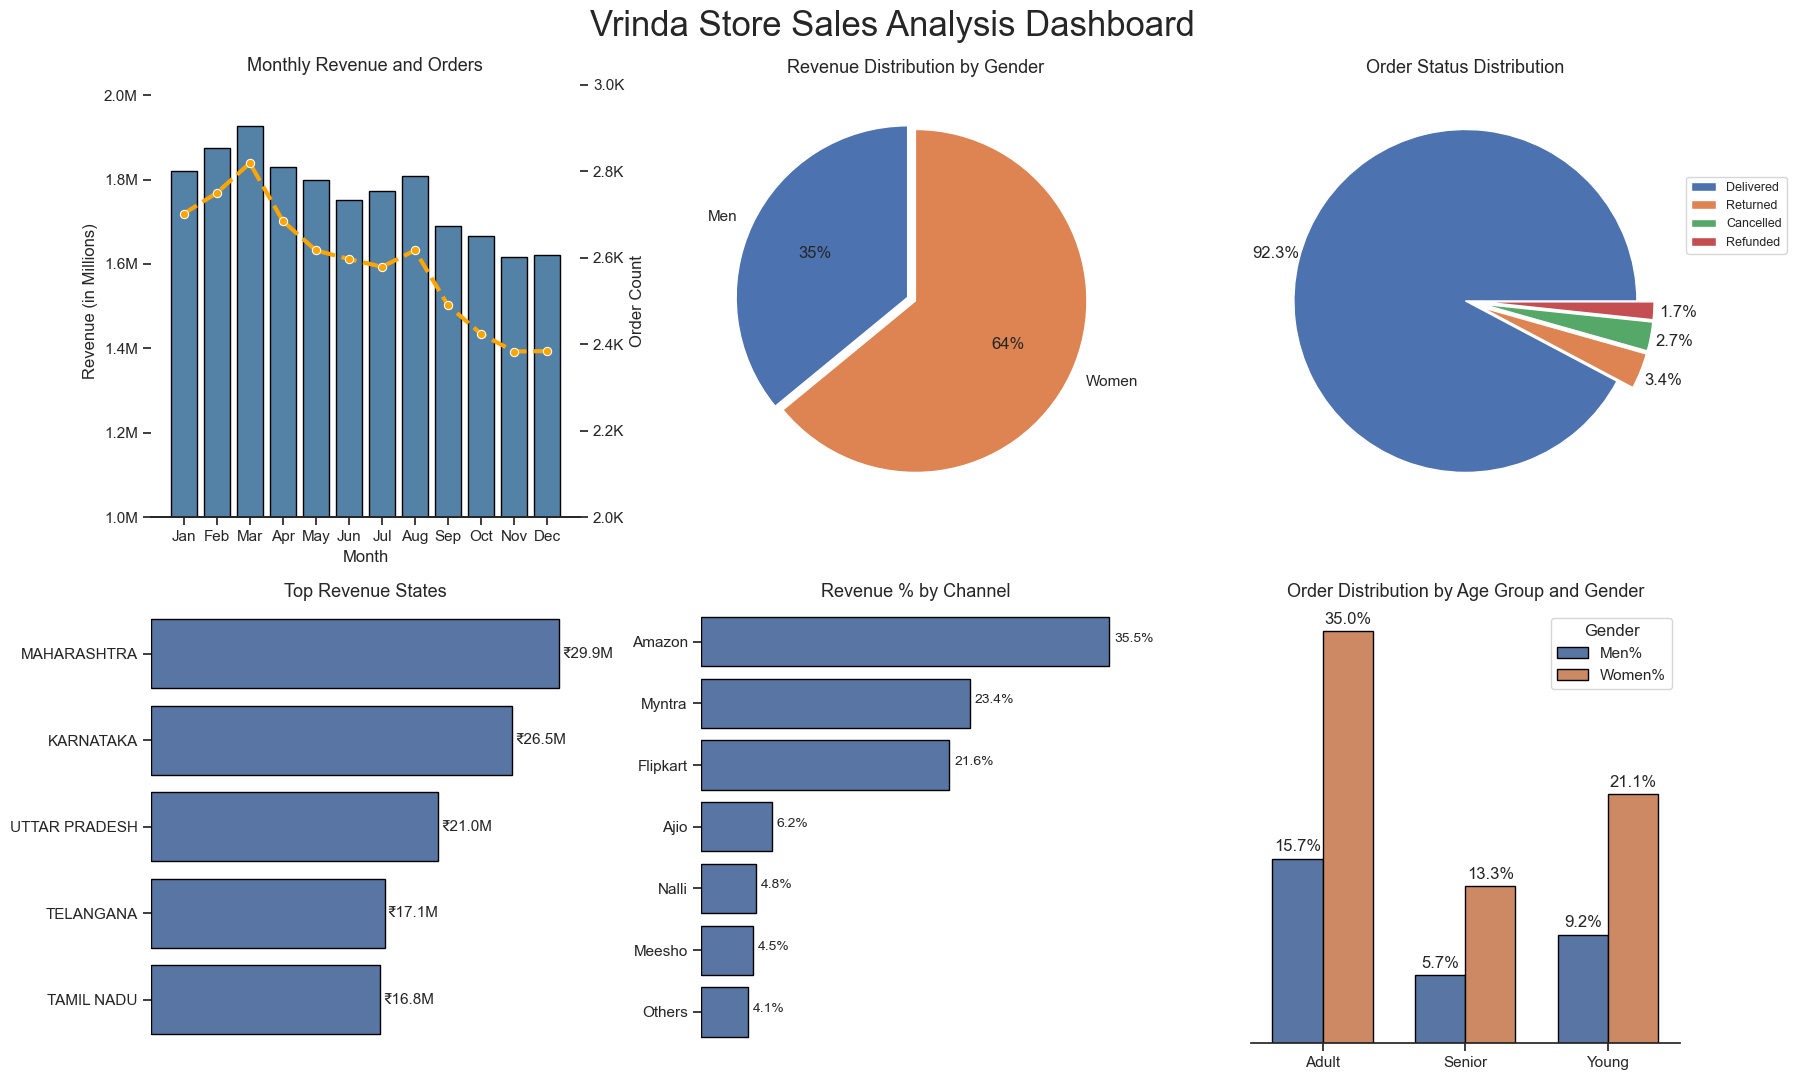

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(18, 11))
ax = ax.flatten()
sns.set_theme(style='ticks')

# 1) Monthly Revenue and Orders
sns.barplot(data = df_monthly_sales,
            x = 'month_name',
            y = 'revenue',
            color = 'steelblue',
            edgecolor = 'black',
            ax = ax[0])

ax[0].set_title("Monthly Revenue and Orders", fontsize=13, pad=10)
ax[0].set_ylim(1_000_000)
ax[0].set_ylabel("Revenue (in Millions)")
ax[0].set_xlabel("Month")
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000000:.1f}M'))

# Create a second y-axis to plot order count
ax2 = ax[0].twinx()

sns.lineplot(data = df_monthly_orders,
             x = 'month_name',
             y = 'order_count',
             color = 'orange',
             marker = 'o',
             linewidth = 3,
             linestyle = '--',
             ax = ax2)

ax2.set_ylim(2000, 3000)
ax2.set_ylabel("Order Count")
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1000:.1f}K'))
sns.despine(left=True)

# Figure 2 - Revenue Distribution by Gender
explode_list = [0.05, 0]
ax[1].pie(df_gender_sales, 
        startangle=90,  
        autopct='%1i%%',
        explode = explode_list,
        labels=['Men', "Women"])

ax[1].set_title("Revenue Distribution by Gender", fontsize=13, pad=10)

# Figure 3 - Order Status Distribution
explode_list = [0, 0.1, 0.1, 0.1]
wedges, texts, autotexts = ax[2].pie(df_order_status,
        startangle = 360,
        autopct = '%1.1f%%',
        labels = None,
        explode = explode_list,
        pctdistance = 1.14)

ax[2].legend(wedges, df_order_status.index, loc='center left', bbox_to_anchor=(1, 0.7), fontsize=9)
ax[2].set_title("Order Status Distribution", fontsize = 13, pad=10)

# Figure 4 - Top Revenue States
sns.barplot(data = df_top_state,
            x = 'revenue',
            y = 'ship-state',
            edgecolor='black',
            ax = ax[3])

ax[3].set_xticks([])

for i, revenue in enumerate(df_top_state['revenue']):
    ax[3].text(revenue + 20000, i, f'₹{revenue/100000 :.1f}M', fontsize= 11, va='center')

ax[3].set_title("Top Revenue States", fontsize = 13, pad=10)
ax[3].set_xlabel('')
ax[3].set_ylabel('')

# Figure 5 - Revenue % by Channel
sns.barplot(data = df_channel_order,
            x = 'Order_%',
            y = 'Channel',
            edgecolor = 'black', 
            ax = ax[4])

ax[4].set_xticks([])

for i, per in enumerate(df_channel_order['Order_%']):
    ax[4].text(per + 0.4, i, f"{per:.1f}%", fontsize = 10)

ax[4].set_title("Revenue % by Channel", fontsize=13, pad=10)
ax[4].set_xlabel('')
ax[4].set_ylabel('')

# Figure 6 - Order Distribution by Age Group and Gender
sns.barplot(data = df_age_group_melted,
            x = 'Age Group',
            y = 'Percentage',
            hue = 'Gender',
            dodge = True,
            width = 0.7,
            edgecolor = 'black',
            ax = ax[5])

ax[5].set_yticks([])

for container in ax[5].containers:
   ax[5].bar_label(container, fmt="%.1f%%", label_type="edge", padding=3)

ax[5].set_title("Order Distribution by Age Group and Gender", fontsize = 13, pad=10)
ax[5].set_xlabel('')
ax[5].set_ylabel('')

# Apply despine to specific subplots
sns.despine(ax=ax[3], left=True, bottom=True)
sns.despine(ax=ax[4], left=True, bottom=True)
sns.despine(ax=ax[5], left=True)

fig.suptitle("Vrinda Store Sales Analysis Dashboard", fontsize=25)
fig.tight_layout()

plt.savefig("Vrinda Store Static Dashboard", dpi=300)
plt.show()

## Interactive Dashboard Preparation
After completing data cleaning, feature engineering, analysis, and a static dashboard, thr next step is to prepare the dataset for an interactive dashboard view.

### Add `Quater` Column
we create a new column named **Quater** from the `Date` field using pandas datetime functions.

This new column is used as a filter input in the Dash app so users can switch between whole-year and quarter-wise insights.
A random sample is displayed afterward to verify that the column was added correctly.

In [26]:
df['Quater'] = pd.to_datetime(df['Date']).dt.quarter
df.sample(5)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Month,Age Group,Quater
15916,26952,408-9737259-7675554,9737259,Women,19,2022-06-06,Delivered,Amazon,JNE1906-KR-031-XXL,kurta,...,INR,349,GOLAGHAT,ASSAM,785621,IN,False,6,Young,2
3169,9545,405-7184050-5937130,7184050,Women,23,2022-02-04,Delivered,Myntra,JNE3617-KR-XXXL,kurta,...,INR,301,MUMBAI,MAHARASHTRA,400043,IN,False,2,Young,1
7632,28884,171-8502220-1276331,8502220,Men,22,2022-03-06,Delivered,Flipkart,SET280-KR-PP-S,Set,...,INR,790,MUMBAI,MAHARASHTRA,400078,IN,False,3,Young,1
118,10031,404-3229910-2274769,3229910,Men,47,2022-01-04,Delivered,Amazon,SET268-KR-NP-L,Set,...,INR,698,JORHAT,ASSAM,785001,IN,False,1,Adult,1
6595,18333,408-5798875-3445922,5798875,Women,31,2022-03-05,Delivered,Amazon,JNE3399-KR-XL,kurta,...,INR,426,BHAVNAGAR,GUJARAT,364001,IN,False,3,Adult,1


### Build and Run the Interactive Dashboard (Dash)
In this step, I create the full **Dash app layout** and define the **callback function** that updates all dashboard visuals based on the selected **Quater** filter.

#### What this cell does:
- Initializes a Dash app.
- Builds a multi-section dashboard layout using:
  - `dcc.Dropdown` for quater selection
  - `dcc.Graph` for Plotly Charts
  - `html.Img` for Matplotlib and Seaborn Charts converted to base64 images
- Defines one callback to dynamically update 6 outputs:
    1. Monthly Revenue and Orders
    2. Revenue Distribution by Gender
    3. Order Status Distribution
    4. Top Revenue States
    5. Channel Order Distribution
    6. Order Distribution by Age Group and Gender
- Runs the Dash server locally.

This creates an interactive business dashboard where users can switch between **whole-year** and **quarter-wise** insights.

In [47]:
app = Dash(__name__)

app.layout = html.Div(children = [
    html.H1("Vrinda Store Sales Dashboard", style={'fontSize':50, 'textAlign':'center', 'color':"#E7AB2987"}),
    html.Div([
        "Quater: ",
        dcc.Dropdown(id = 'input_qauter',
                     options=[{'label':'Whole Year', 'value':'all'},
                              {'label':'Jan-Mar', 'value':1},
                              {'label':'Apr-Jun', 'value':2},
                              {'label':'Jul-Sep', 'value':3},
                              {'label':'Oct-Dec', 'value':4}],
                     value='all',
                     clearable = False,
                     style = {'height':'25px', 'width':'200px', 'margin':'0 auto', 'textAlign':'center'})
    ], style={'textAlign':'center', 'fontSize':20}),
    html.Br(),
    html.Div([
        html.Div(html.Img(id = 'monthly_sales'), style={'width':'50%'}),
        html.Div(dcc.Graph(id = 'gender_revenue'), style={'width':'50%'})
    ], style={'display':'flex'}),
    html.Div([
        html.Div(dcc.Graph(id = 'status_distribution'), style={'width':'50%'}),
        html.Div(dcc.Graph(id = 'top_states'), style={'width':'50%'})
    ], style={'display':'flex'}),
    html.Div([
        html.Div(dcc.Graph(id = 'channel_distribution'), style={'width':'60%'}),
        html.Div(html.Img(id = 'age_group'), style={'width':'40%'})
    ], style={'display':'flex'})
], style={
    'background_color':'white'
})

@app.callback([
    Output('monthly_sales', 'src'),
    Output('gender_revenue', 'figure'),
    Output('status_distribution', 'figure'),
    Output('top_states', 'figure'),
    Output('channel_distribution', 'figure'),
    Output('age_group', 'src')
            ],  
    Input('input_qauter', 'value'))

def get_graph(quater):
    if quater is None or quater == 'all':
        df_quarter = df.copy()
    else:
        df_quarter = df[df['Quater'] == quater]
   
    # Figure 1 -> Monthly Sales and Order
    monthly_sales = df_quarter.groupby('Month')['Amount'].sum().reset_index()
    monthly_sales.sort_values('Month', inplace=True)
    monthly_sales['month_name'] = pd.to_datetime(monthly_sales['Month'], format='%m').dt.strftime('%b')

    monthly_order = df_quarter.groupby('Month')['Order ID'].size().reset_index()
    monthly_order.sort_values('Month', inplace=True)
    monthly_order['month_name'] = pd.to_datetime(monthly_order['Month'], format='%m').dt.strftime('%b')

    fig, ax = plt.subplots(figsize=(6.5, 4.75))
    sns.set_theme(style='ticks')
    sns.barplot(data=monthly_sales,
                x='month_name',
                y='Amount',
                color='steelblue',
                edgecolor='black',
                ax=ax)

    ax.set_ylim(1_000_000)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"₹{y/1000000:,.1f}M"))
    ax.set_ylabel("Revenue")
    ax.set_xlabel("")

    ax1 = ax.twinx()
    sns.lineplot(data=monthly_order,
                 x='month_name',
                 y='Order ID',
                 color='orange',
                 marker='o',
                 ax=ax1)

    ax1.set_ylim(2000, 3000)
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{y/1000:,.1f}k"))
    ax1.set_ylabel("Order Count")

    fig.suptitle("Monthly Revenue and Orders", fontsize=13)
    sns.despine(left=True)
       
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    fig1 =  f"data:image/png;base64,{encoded}"
    
    
    # Figure 2 -> Gender Distribution
    df_gender_sales = df_quarter.groupby('Gender')['Amount'].sum().reset_index()
    fig2 = px.pie(data_frame=df_gender_sales,
                  values = 'Amount',
                  names = 'Gender',
                  template = 'plotly_white')
    
    fig2.update_layout(title = "Order Status Distribution",
                        title_x = 0.5,
                        showlegend = True)
    
    # Figure 3 -> Order Status Distribution
    df_order_status = df_quarter["Status"].value_counts().reset_index(name="count")
    df_order_status.columns = ["Status", "count"]
    fig3 = px.pie(
        df_order_status,
        values="count",
        names="Status",
        template="plotly_white")
        
    fig3.update_layout(title = "Order Status Distribution",
                        title_x = 0.5)
    
    # Figure 4 -> Top revenue State
    df_top_states = df_quarter.groupby('ship-state')['Amount'].sum().nlargest(5).reset_index()
    fig4 = px.bar(data_frame = df_top_states.iloc[::-1],
                  x = 'Amount',
                  y = 'ship-state',
                  template = 'plotly_white',
                  orientation='h')
          
    fig4.update_layout(title = "Top Revenue State",
                       title_x = 0.5,
                       xaxis_title = "",
                       yaxis_title = "")
    
    fig4.update_traces(marker={"line":{'color':'black','width':1}},
                       text = [f"₹{x/1000000:.1f}M" for x in df_top_states.iloc[::-1]['Amount']] if quater == 'all' else [f"₹{x/1000:.2f}k" for x in df_top_states.iloc[::-1]['Amount']],
                       textposition = 'inside')
    
    fig4.update_xaxes(showticklabels = False)
    
    # Figure 5 -> Order Percentage by Channel
    df_channel_order = df_quarter['Channel'].value_counts().reset_index()
    df_channel_order['Order_%']= round(df_channel_order['count'] / df['Order ID'].count() * 100, 1)
    
    fig5 = px.bar(data_frame = df_channel_order.iloc[::-1],
                  x = 'Order_%',
                  y = 'Channel',
                  template = 'plotly_white')
    
    fig5.update_layout(title = "Order Percentage by Channel",
                       title_x = 0.5,
                       xaxis_title = '',
                       yaxis_title = '')
    
    fig5.update_traces(marker = {"line":{'color':'black', 'width':1}},
                       text = [f"{x}%" for x in df_channel_order.iloc[::-1]['Order_%']],
                       textposition = "inside")
    
    fig5.update_xaxes(showticklabels = False)
    
    # Figure 6 -> Order Distribution by Age Group and Gender
    df_age_group = df_quarter.pivot_table(index='Age Group', columns='Gender', values='Order ID', aggfunc='size')
    df_age_group['Men%'] = round(df_age_group['Men'] / df['Order ID'].size * 100, 1)
    df_age_group['Women%'] = round(df_age_group['Women'] / df['Order ID'].size * 100, 1)
    
    df_age_group_melted = df_age_group.reset_index().melt(
    id_vars = 'Age Group',
    value_vars = ['Men%', 'Women%'],
    value_name = 'Percentage',
    var_name = 'Gender')
    
    plt.figure(figsize=(6.5, 4.75))
    sns.set_theme(style='ticks')

    ax = sns.barplot(data = df_age_group_melted,
            x = 'Age Group',
            y = 'Percentage',
            hue = 'Gender',
            dodge = True,
            edgecolor = 'black')

    plt.yticks([])
    for container in ax.containers:
        plt.bar_label(container, fmt = '%1.1f%%', padding=3)
    
    plt.title("Order Distribution by Age Group and Gender", fontsize=13)
    plt.xlabel("")
    plt.ylabel("")
    sns.despine(left=True)
    
    buf = io.BytesIO()
    plt.savefig(buf, format = 'png', bbox_inches='tight')
    plt.close()
    buf.seek(0)
    
    encoded = base64.b64encode(buf.read()).decode('utf-8')
    fig6 = f"data:image/png;base64,{encoded}"
       
    return [fig1, fig2, fig3, fig4, fig5, fig6]    

if __name__ == '__main__':
    app.run(port = 8075, host = '127.0.0.1', debug = True)

## 🔍 Key Insights

- **Women contribute ~64% of total revenue**, making them the dominant customer segment.
- **Maharashtra, Karnataka, and Uttar Pradesh contribute ~36.6% of total revenue**.
- The **Adult age group (30–49 years) contributes ~50.6% of total orders**.
- **Amazon, Myntra, and Flipkart together contribute ~80.4% of total revenue**.

#### 1. Sales Momentum Weakens in Q4
- **March is the strongest month** in both revenue (**₹1.93M**) and order volume (**2,819** orders).
- **November is the weakest month** with revenue at **₹1.62M** and **2,383** orders.
- From peak (March) to low (November), revenue drops by roughly **16%**, indicating end-of-year slowdown.

#### 2. Fulfillment Performance Is Strong, but Return Leakage Exists
- **Delivered orders: ~92.3%** (28,641 out of 31,047), showing strong operational execution.
- Combined non-success outcomes (**Returned + Cancelled + Refunded**) are about **7.7%**, which is a clear optimization opportunity.

#### 3. Revenue Is Concentrated Geographically
- Top 5 states (Maharashtra, Karnataka, Uttar Pradesh, Telangana, Tamil Nadu) contribute roughly **52.6%** of total revenue.
- This indicates high regional concentration and scope to scale in underperforming states.

#### 4. Female Dominance Is Consistent Across All Age Groups
- Women contribute close to **70% of orders** in **Young**, **Adult**, and **Senior** segments.
- This consistency suggests campaigns tailored for women can be generalized across age bands with segment-specific creatives.

#### 5. Adult Segment Is the Core Growth Lever
- **Adult customers (30–49)** account for around **50.6%** of total orders.
- Protecting this segment while improving conversion in **Young (30.3%)** can create balanced growth.

## 🚀 Business Recommendations

---

### 🎯 Target Audience
- **Primary:** Women aged **30–49 years** (Adult segment) — highest order share (~50.6%)
- **Secondary:** Young women aged **18–29 years** — growing segment with untapped potential
- **Retention Focus:** Senior women (50+) — loyal buyers with consistent purchasing behavior

---

### 📍 Target Locations

#### 🔝 High-Priority States (Maintain & Scale)
| State | Contribution |
|-------|-------------|
| Maharashtra | Highest revenue contributor |
| Karnataka | 2nd highest revenue contributor |
| Uttar Pradesh | 3rd highest revenue contributor |

#### 📈 Growth Opportunity States (Expand & Invest)
- **Telangana** and **Tamil Nadu** — top 5 states with room to scale
- Underperforming states — launch **geo-targeted campaigns** to expand reach

---

### 🛒 Target Channels

#### 💎 Top Performing (Invest More)
- **Amazon** — Highest order share
- **Myntra** — Fashion-focused, ideal for women's category
- **Flipkart** — Broad reach across demographics

---

### 📣 Marketing Strategy

#### 🗓️ Seasonal Campaigns
- Launch **festive sales** during Q1 (Jan–Mar) to capitalize on peak revenue season
- Run **re-engagement campaigns** in Q4 (Oct–Dec) to counter the ~16% revenue dip
- Use **flash sales** and **limited-time offers** during off-peak months (Sep–Nov)

#### 💰 Promotions & Offers
- Offer **personalized coupons** for repeat customers (loyalty rewards)
- Provide **bundle discounts** on best-selling categories

#### 📱 Digital Advertising
- Run **Instagram & Facebook ads** targeting women aged 30–49 in top states
- Use **regional language creatives** for Maharashtra, Karnataka, and UP to improve CTR

#### 🔄 Reduce Return & Cancellation Rate (7.7%)
- Improve **product descriptions and sizing guides** to reduce mismatch returns
- Offer **easy exchange** instead of returns to retain revenue
- Send **order confirmation + delivery tracking** notifications to reduce cancellations

---

### 📊 Summary Action Plan

| Priority | Action | Impact |
|----------|--------|--------|
| 🔴 High | Target women 30–49 in MH, KA, UP via Amazon/Myntra/Flipkart | Revenue growth |
| 🔴 High | Launch Q4 re-engagement campaigns to reduce seasonal dip | Stabilize revenue |
| 🟡 Medium | Expand geo-targeting to Telangana & Tamil Nadu | New market growth |
| 🟡 Medium | Reduce return/cancellation rate below 5% | Revenue retention |
| 🟢 Low | Test underperforming channels with targeted offers | Channel diversification |